<a href="https://colab.research.google.com/github/Kumaran-Kugathasan/tamilchatbot/blob/main/TamilChatSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_list = []
filepath ='/content/bank.csv'
df = pd.read_csv(filepath, encoding = "utf-8", names=['sentence', 'label'], sep=',')
df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    நான் 2in1 கணக்கில் சேமிப்பது எப்படி ?
label                           2in1_acoount_info
Name: 0, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

sentences = df['sentence'].values
y = df['label'].values

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

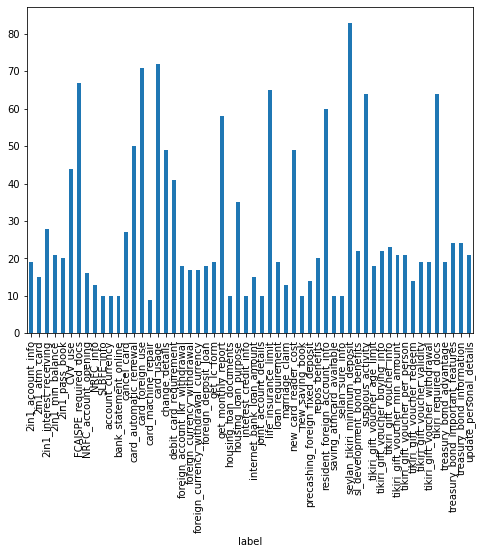

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('label').size().plot.bar(ylim=0)
plt.show()

In [ ]:
ab = df.groupby('label').count()
print(ab.sort_values(by="sentence",axis=0))



                                      sentence
label                                         
card_machine_repair                          9
interest_credit_info                        10
joint_account_details                       10
new_saving_book                             10
saving_atmcard_available                    10
bank_statement_online                       10
account_currency                            10
SLBFE_info                                  10
selan_sure_info                             10
housing_loan_documents                      10
NRFC_info                                   13
marriage_claim                              13
precashing_foreign_fixed_deposit            14
tikiri_gift_voucher_redeem                  14
internet_bank_loan_amount                   15
2in1_atm_card                               15
NRFC_account_opening                        16
foreign_currency_withdrawal                 17
foreign_currency_withdrawal_currency        17
tikiri_gift_v

In [ ]:
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.30)


In [ ]:
vectorizer = CountVectorizer(encoding='utf-8', tokenizer=nltk.word_tokenize)
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)


/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
C = 1.0 # SVM regularization parameter

classifier = svm.SVC(kernel='linear', C=1,gamma=1)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.9808917197452229


In [ ]:
#print(sentences_test[0:10])
y_pred =classifier.predict(X_test)
df = pd.DataFrame(sentences_test, columns=["X"])
df["actual"] = y_test
df["predicted"] = y_pred

incorrect = df[df["actual"] != df["predicted"]]
incorrect.to_csv(r'pandas.txt', header=None, index=None, sep=' ', mode='a')
print(incorrect)

                                                     X  ...                             predicted
2    இலங்கை வங்கி கடன் கணக்கு ஒன்று ஆரம்பிக்க தேவைய...  ...         seylan_tikiri_minimum_deposit
93   எனது இலங்கை வங்கியின் மாத அறிக்கைகளை பெற நான் ...  ...                     suspious_activity
96   இணைய வங்கி சேவையை பயன்படுத்தி செலுத்த வேண்டிய ...  ...                        change_details
98   என்னுடைய இலங்கை வங்கி கடனட்டையை பிறநாடுகளில் ப...  ...                            card_usage
189  திறைசேரி பிணைப்பத்திரங்கள் மூலம் கடன் பெறமுடிய...  ...      treasury_bond_important_features
233  நான் செலுத்த வேண்டிய கடன் தொகையை அறிந்து கொள்வ...  ...                            card_usage
329    இணையத்தின் மூலம் வங்கி கூற்றினை பெறுவது எப்படி?  ...                        marriage_claim
373  வெளிநாட்டு நாணய நிலையான வைப்பினை வங்கிக்கு அறி...  ...  foreign_currency_withdrawal_currency
421                    கடனட்டையை தடைசெய்யும் வழி என்ன?  ...                            card_usage

[9 rows x 3 columns

In [ ]:
predictions = classifier.predict(X_test)
for input, prediction, label in zip(inputs, predictions, labels):
  if prediction != label:
    print(input, 'has been classified as ', prediction, 'and should be ', label) 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import numpy as np 
predictions = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[ 7  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0  6]]


In [ ]:
vectorizer.vocabulary_

{"''": 0,
 '(': 1,
 ')': 2,
 ',': 3,
 '.': 4,
 '.செலான்': 5,
 '1': 6,
 '2': 7,
 '2in': 8,
 '2in1': 9,
 '2இன்': 10,
 '?': 11,
 '``': 12,
 'account': 13,
 'amount': 14,
 'atm': 15,
 'bank': 16,
 'boc': 17,
 'card': 18,
 'ceylon': 19,
 'complete': 20,
 'credit': 21,
 'cvv': 22,
 'date': 23,
 'debit': 24,
 'doubts': 25,
 'fcaispe': 26,
 'foreign': 27,
 'illegal': 28,
 'in': 29,
 'in1': 30,
 'issues': 31,
 'lc': 32,
 'methods': 33,
 'miss': 34,
 'money': 35,
 'new': 36,
 'nrfc': 37,
 'of': 38,
 'ondu': 39,
 'open': 40,
 'qualifications': 41,
 'reader': 42,
 'repos': 43,
 'resident': 44,
 'savings': 45,
 'seylan': 46,
 'slbfe': 47,
 'start': 48,
 'steps': 49,
 'sure': 50,
 'suspicious': 51,
 'tikiri': 52,
 'use': 53,
 'visa': 54,
 'அக்கௌன்ட்': 55,
 'அடிப்படையில்': 56,
 'அட்டயை': 57,
 'அட்டை': 58,
 'அட்டைகளை': 59,
 'அட்டைக்கான': 60,
 'அட்டைக்கு': 61,
 'அட்டைக்குரிய': 62,
 'அட்டைய': 63,
 'அட்டையினை': 64,
 'அட்டையின்': 65,
 'அட்டையில': 66,
 'அட்டையில்': 67,
 'அட்டையுடன்': 68,
 'அட்டையை': 69,
 '